# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | burang
Processing Record 3 of Set 1 | tual
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | gargalianoi
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | mejit
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | xining
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | caleta de carquin
Processing Record 18 of Set 1 | katghora
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | ola
Processing Record 21 of Set 1 | fale old settlement
Processing Record 22 of Set 1 | rongelap
Processin

Processing Record 39 of Set 4 | nuuk
Processing Record 40 of Set 4 | sitia
Processing Record 41 of Set 4 | port douglas
Processing Record 42 of Set 4 | brasov
Processing Record 43 of Set 4 | canutama
Processing Record 44 of Set 4 | glenfield park
Processing Record 45 of Set 4 | dudinka
Processing Record 46 of Set 4 | ardakan
Processing Record 47 of Set 4 | chengde
Processing Record 48 of Set 4 | vadso
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 0 of Set 5 | tomatlan
Processing Record 1 of Set 5 | novouzensk
Processing Record 2 of Set 5 | kovalam
Processing Record 3 of Set 5 | akot
Processing Record 4 of Set 5 | igrim
Processing Record 5 of Set 5 | micheweni
Processing Record 6 of Set 5 | uturoa
Processing Record 7 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 8 of Set 5 | mount gambier
Processing Record 9 of Set 5 | altai
Processing Record 10 of Set 5 | andergrove
Processing Record 11 of Set 5 | yeed
Processing Record 12 of Set 5 | holualoa
Pr

Processing Record 30 of Set 8 | muisne
Processing Record 31 of Set 8 | chotila
Processing Record 32 of Set 8 | sangre grande
Processing Record 33 of Set 8 | berdigestyakh
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | gospic
Processing Record 36 of Set 8 | labrador city
Processing Record 37 of Set 8 | rosarito
Processing Record 38 of Set 8 | chiili
City not found. Skipping...
Processing Record 39 of Set 8 | nantucket
Processing Record 40 of Set 8 | agat village
Processing Record 41 of Set 8 | douz
Processing Record 42 of Set 8 | brokopondo
Processing Record 43 of Set 8 | baymak
Processing Record 44 of Set 8 | leh
Processing Record 45 of Set 8 | kirakira
Processing Record 46 of Set 8 | merizo village
Processing Record 47 of Set 8 | fortuna
Processing Record 48 of Set 8 | betio village
Processing Record 49 of Set 8 | inekar
City not found. Skipping...
Processing Record 0 of Set 9 | elektrogorsk
Processing Record 1 of Set 9 | arkhangel'sk
Processing Record 2 of Set

Processing Record 19 of Set 12 | inverell
Processing Record 20 of Set 12 | hadibu
Processing Record 21 of Set 12 | usakos
Processing Record 22 of Set 12 | utrik
Processing Record 23 of Set 12 | leava
Processing Record 24 of Set 12 | buta
Processing Record 25 of Set 12 | fort-shevchenko
Processing Record 26 of Set 12 | virginia beach
Processing Record 27 of Set 12 | gunjur
Processing Record 28 of Set 12 | tirumakudal narsipur
Processing Record 29 of Set 12 | lebanon
Processing Record 30 of Set 12 | kigoma
Processing Record 31 of Set 12 | portoferraio
Processing Record 32 of Set 12 | port augusta
Processing Record 33 of Set 12 | ljungby
Processing Record 34 of Set 12 | wagar
Processing Record 35 of Set 12 | ust'-kalmanka
Processing Record 36 of Set 12 | badger
Processing Record 37 of Set 12 | ar ruseris
Processing Record 38 of Set 12 | kuhmo
Processing Record 39 of Set 12 | hornostayivka
Processing Record 40 of Set 12 | mar del plata
Processing Record 41 of Set 12 | santa sylvina
Process

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")


# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.17,90,100,5.04,TF,1699854888
1,burang,30.2500,81.1667,3.03,30,0,2.85,CN,1699854888
2,tual,-5.6667,132.7500,27.76,77,39,4.36,ID,1699854889
3,aasiaat,68.7098,-52.8699,-14.82,91,79,2.63,GL,1699854889
4,adamstown,-25.0660,-130.1015,22.77,87,100,8.67,PN,1699854889


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

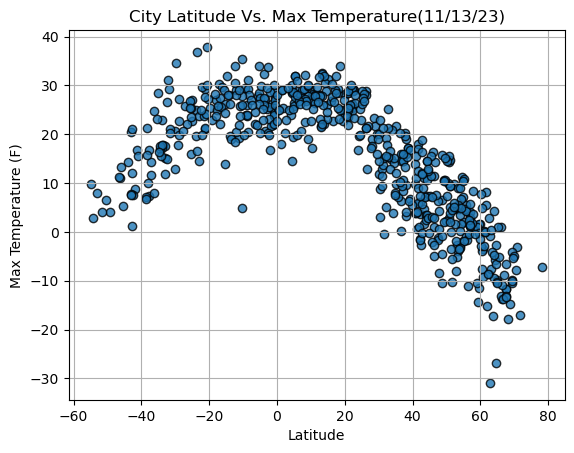

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")



# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

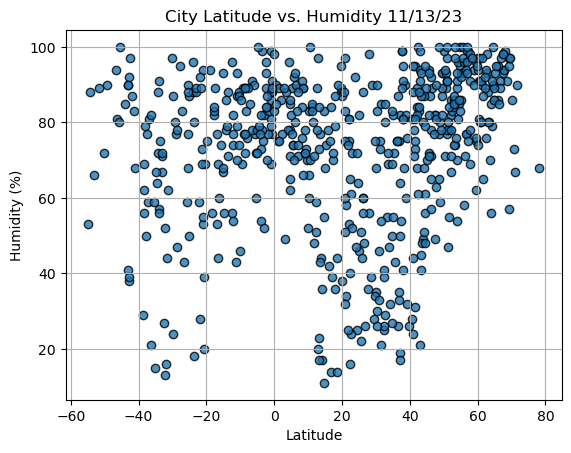

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

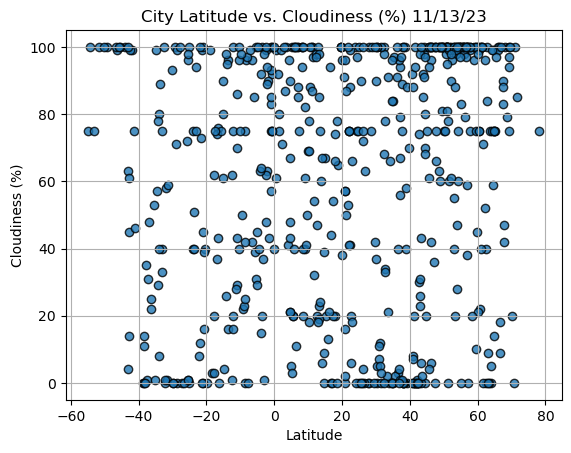

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

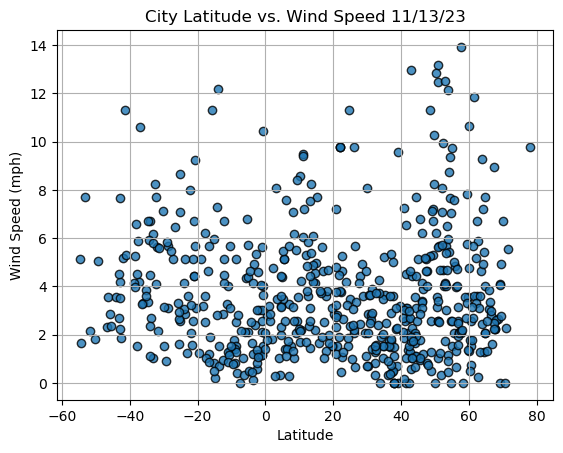

In [15]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, coordonates ='Linear Regression Plot'):
    
    
    (slope, intercept, r_value, p_value, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    
    #
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,burang,30.2500,81.1667,3.03,30,0,2.85,CN,1699854888
3,aasiaat,68.7098,-52.8699,-14.82,91,79,2.63,GL,1699854889
6,kodiak,57.7900,-152.4072,0.73,69,75,2.06,US,1699854889
7,gargalianoi,37.0667,21.6333,15.75,82,94,1.73,GR,1699854889
8,tiksi,71.6872,128.8694,-17.06,90,85,5.54,RU,1699854889


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.17,90,100,5.04,TF,1699854888
2,tual,-5.6667,132.7500,27.76,77,39,4.36,ID,1699854889
4,adamstown,-25.0660,-130.1015,22.77,87,100,8.67,PN,1699854889
5,ushuaia,-54.8000,-68.3000,9.81,53,75,5.14,AR,1699854889
11,blackmans bay,-43.0167,147.3167,20.41,41,4,2.24,AU,1699854890


###  Temperature vs. Latitude Linear Regression Plot

TypeError: annotate() missing 1 required positional argument: 'xy'

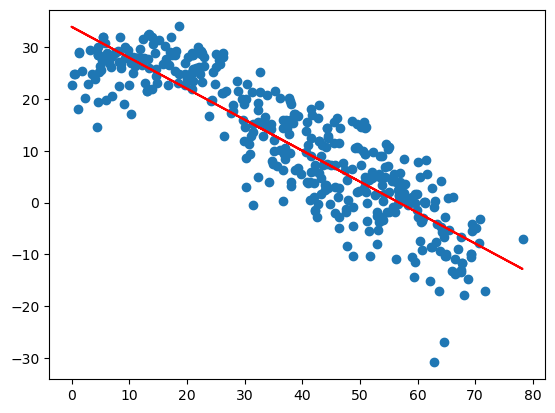

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp", (6,30))

TypeError: annotate() missing 1 required positional argument: 'xy'

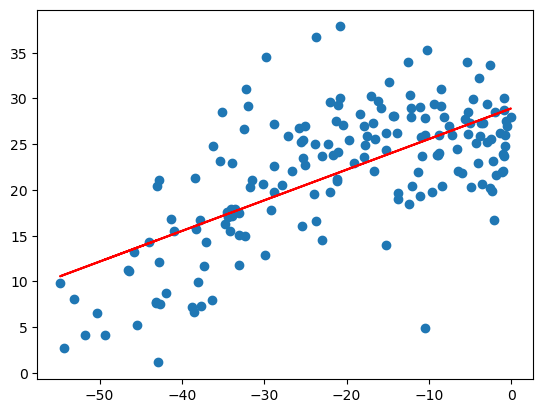

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

TypeError: annotate() missing 1 required positional argument: 'xy'

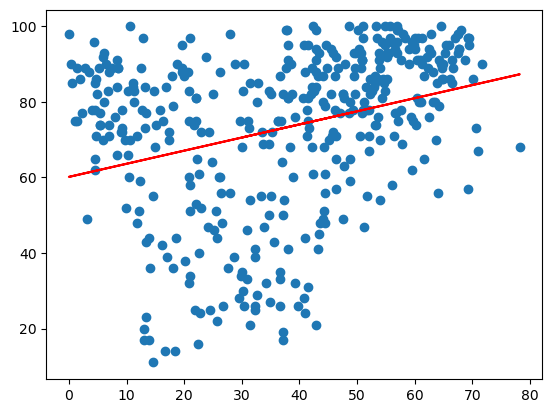

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

TypeError: annotate() missing 1 required positional argument: 'xy'

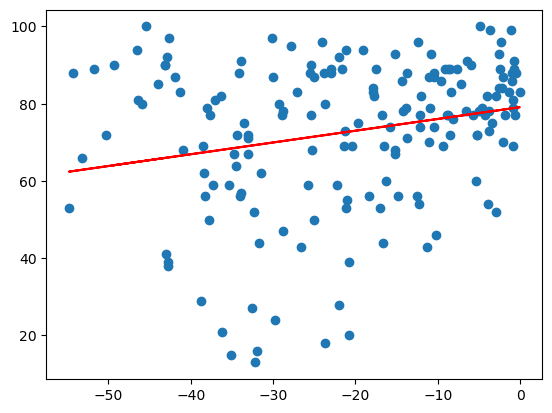

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

TypeError: annotate() missing 1 required positional argument: 'xy'

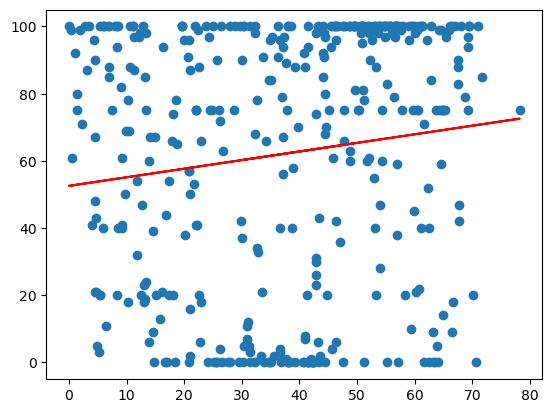

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

TypeError: annotate() missing 1 required positional argument: 'xy'

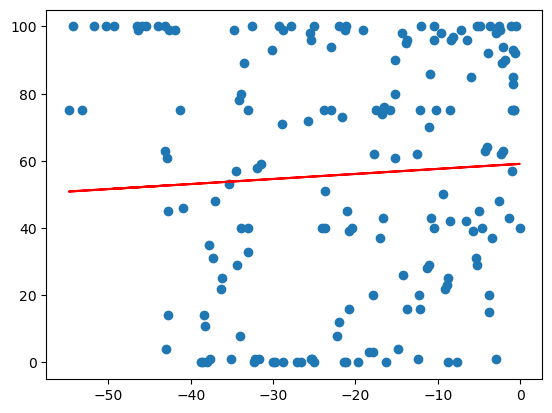

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

TypeError: annotate() missing 1 required positional argument: 'xy'

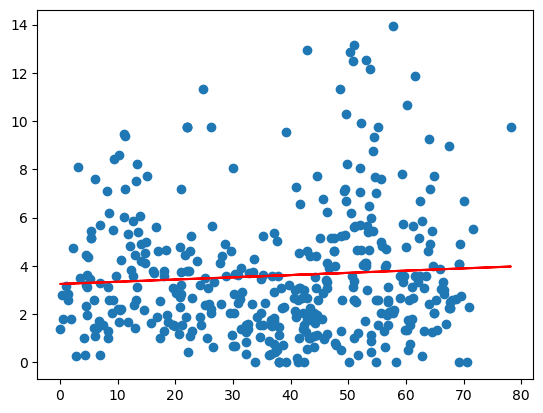

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

TypeError: annotate() missing 1 required positional argument: 'xy'

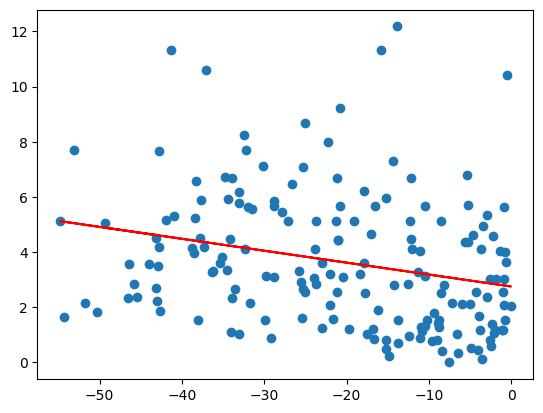

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE